In [1]:
import pandas as pd

df_partidos = pd.read_csv("partidos_cebollitas.csv")

# Añadimos claramente variables creadas anteriormente
df_partidos['diferencia_goles'] = df_partidos['goles_local'] - df_partidos['goles_visitante']
df_partidos['ratio_tiros_posesion_local'] = df_partidos['tiros_arco_local'] / df_partidos['posesion_local (%)']

df_partidos.head()


,fecha_partido,equipo_local,equipo_visitante,goles_local,goles_visitante,posesion_local (%),posesion_visitante (%),tiros_arco_local,tiros_arco_visitante,estadio,diferencia_goles,ratio_tiros_posesion_local
0,2023-01-01,Atlético Python,Cebollitas FC,2,0,54,46,12,6,Python Arena,2,0.222222
1,2023-01-08,NumPy City,Atlético Python,1,5,60,40,12,3,Estadio ML,-4,0.200000
2,2023-01-15,Cebollitas FC,Data United,1,0,55,45,10,7,Python Arena,1,0.181818
3,2023-01-22,Atlético Python,Data United,2,3,57,43,3,3,Campo Pandas,-1,0.052632
4,2023-01-29,Data United,Cebollitas FC,5,3,52,48,7,12,Estadio ML,2,0.134615


In [2]:
from sklearn.feature_selection import SelectKBest, f_regression

# Variables predictoras y objetivo
X = df_partidos[['posesion_local (%)', 'tiros_arco_local', 'ratio_tiros_posesion_local']]
y = df_partidos['goles_local']

# Seleccionar las 2 mejores variables
selector = SelectKBest(score_func=f_regression, k=2)
selector.fit(X, y)

# Resultados ordenados por relevancia
scores = selector.scores_
variables = X.columns

resultados = pd.DataFrame({'Variable': variables, 'Score': scores}).sort_values(by='Score', ascending=False)
resultados


,Variable,Score
0,posesion_local (%),2.844159
2,ratio_tiros_posesion_local,2.323320
1,tiros_arco_local,1.372691


In [3]:
from sklearn.tree import DecisionTreeRegressor

# Entrenar árbol de decisión para medir la importancia
modelo_arbol = DecisionTreeRegressor(random_state=42)
modelo_arbol.fit(X, y)

# Importancia calculada por el modelo
importancia = modelo_arbol.feature_importances_

resultado_importancia = pd.DataFrame({
    'Variable': variables, 
    'Importancia': importancia
}).sort_values(by='Importancia', ascending=False)

resultado_importancia


,Variable,Importancia
0,posesion_local (%),0.491563
2,ratio_tiros_posesion_local,0.305755
1,tiros_arco_local,0.202683


/var/folders/bg/pd8rtwgx4g36zn_rz90ljk200000gn/T/ipykernel_62347/2144371934.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='Blues_r')
/var/folders/bg/pd8rtwgx4g36zn_rz90ljk200000gn/T/ipykernel_62347/2144371934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importancia', y='Variable', data=resultado_importancia, ax=ax[1], palette='Greens_r')


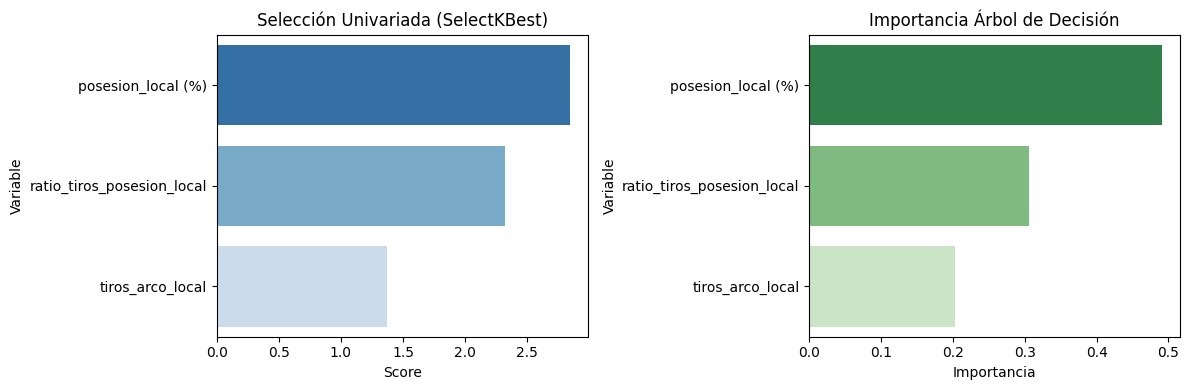

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# Gráfica SelectKBest (análisis univariado)
sns.barplot(x='Score', y='Variable', data=resultados, ax=ax[0], palette='Blues_r')
ax[0].set_title('Selección Univariada (SelectKBest)')

# Gráfica Importancia (árbol decisión)
sns.barplot(x='Importancia', y='Variable', data=resultado_importancia, ax=ax[1], palette='Greens_r')
ax[1].set_title('Importancia Árbol de Decisión')

plt.tight_layout()
plt.show()
